In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
database = "pagila"
username = "postgres"
password = "postgres"
host = "localhost"
port = "5432"

In [3]:

db_uri = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"

In [4]:
engine = create_engine(db_uri)

In [6]:
tables = pd.read_sql(
"""
SELECT *
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE' 
AND TABLE_SCHEMA='public'
""",
engine
)
tables

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,pagila,public,film_actor,BASE TABLE,None,None,None,None,None,YES,NO,None
1,pagila,public,address,BASE TABLE,None,None,None,None,None,YES,NO,None
2,pagila,public,city,BASE TABLE,None,None,None,None,None,YES,NO,None
3,pagila,public,actor,BASE TABLE,None,None,None,None,None,YES,NO,None
4,pagila,public,category,BASE TABLE,None,None,None,None,None,YES,NO,None
5,pagila,public,address_template,BASE TABLE,None,None,None,None,None,YES,NO,None
6,pagila,public,country,BASE TABLE,None,None,None,None,None,YES,NO,None
7,pagila,public,customer,BASE TABLE,None,None,None,None,None,YES,NO,None
8,pagila,public,database_metadata,BASE TABLE,None,None,None,None,None,YES,NO,None
9,pagila,public,film_category,BASE TABLE,None,None,None,None,None,YES,NO,None


In [9]:
film_actors = pd.read_sql_query(
    "SELECT * FROM film_actor LIMIT 5;",
    engine
)
film_actors

,actor_id,film_id,last_update
0,1,1,2022-02-15 10:05:03+00:00
1,1,23,2022-02-15 10:05:03+00:00
2,1,25,2022-02-15 10:05:03+00:00
3,1,106,2022-02-15 10:05:03+00:00
4,1,140,2022-02-15 10:05:03+00:00


### Vanna AI

In [12]:
from vanna.remote import VannaDefault

In [13]:
api_key = "8262f6f84e3c4053bdd0698d64ad6404"
vn = VannaDefault(model="mypagilamodel", api_key=api_key)

In [14]:
vn.connect_to_postgres(
    dbname=database,
    user=username,
    password=password,
    host=host,
    port=port
)

In [16]:
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")
df_information_schema

,table_catalog,table_schema,table_name,column_name,ordinal_position,column_default,is_nullable,data_type,character_maximum_length,character_octet_length,...,is_identity,identity_generation,identity_start,identity_increment,identity_maximum,identity_minimum,identity_cycle,is_generated,generation_expression,is_updatable
0,pagila,information_schema,_pg_foreign_data_wrappers,authorization_identifier,6,None,YES,name,NaN,NaN,...,NO,None,None,None,None,None,NO,NEVER,None,NO
1,pagila,pg_catalog,pg_type,typsubscript,13,None,NO,regproc,NaN,NaN,...,NO,None,None,None,None,None,NO,NEVER,None,YES
2,pagila,pg_catalog,pg_class,relpersistence,16,None,NO,"""char""",NaN,NaN,...,NO,None,None,None,None,None,NO,NEVER,None,YES
3,pagila,pg_catalog,pg_stat_ssl,client_dn,6,None,YES,text,NaN,1.073742e+09,...,NO,None,None,None,None,None,NO,NEVER,None,NO
4,pagila,pg_catalog,pg_index,indisready,13,None,NO,boolean,NaN,NaN,...,NO,None,None,None,None,None,NO,NEVER,None,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,pagila,pg_catalog,pg_subscription,subskiplsn,3,None,NO,pg_lsn,NaN,NaN,...,NO,None,None,None,None,None,NO,NEVER,None,YES
2276,pagila,pg_catalog,pg_statistic_ext,stxnamespace,4,None,NO,oid,NaN,NaN,...,NO,None,None,None,None,None,NO,NEVER,None,YES
2277,pagila,information_schema,data_type_privileges,object_catalog,1,None,YES,name,NaN,NaN,...,NO,None,None,None,None,None,NO,NEVER,None,NO
2278,pagila,information_schema,schemata,schema_owner,3,None,YES,name,NaN,NaN,...,NO,None,None,None,None,None,NO,NEVER,None,NO


In [17]:
plan = vn.get_training_plan_generic(df_information_schema)
plan

Train on Information Schema: pagila.information_schema _pg_foreign_data_wrappers
Train on Information Schema: pagila.information_schema element_types
Train on Information Schema: pagila.information_schema columns
Train on Information Schema: pagila.information_schema routine_privileges
Train on Information Schema: pagila.information_schema routines
Train on Information Schema: pagila.information_schema attributes
Train on Information Schema: pagila.information_schema key_column_usage
Train on Information Schema: pagila.information_schema foreign_tables
Train on Information Schema: pagila.information_schema foreign_table_options
Train on Information Schema: pagila.information_schema routine_sequence_usage
Train on Information Schema: pagila.information_schema views
Train on Information Schema: pagila.information_schema _pg_user_mappings
Train on Information Schema: pagila.information_schema parameters
Train on Information Schema: pagila.information_schema role_table_grants
Train on Info

In [18]:
vn.train(plan=plan)

#### DDL Statements

In [19]:
ddl_statements = """
CREATE TABLE public.actor (
    actor_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,
    first_name VARCHAR(45) NOT NULL,
    last_name VARCHAR(45) NOT NULL,
    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now()
);

CREATE TABLE public.category (
    category_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,
    name VARCHAR(25) NOT NULL,
    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now()
);

CREATE TABLE public.film (
    film_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,
    title VARCHAR(255) NOT NULL,
    description TEXT,
    release_year YEAR,
    language_id SMALLINT NOT NULL,
    original_language_id SMALLINT,
    rental_duration SMALLINT NOT NULL DEFAULT 3,
    rental_rate NUMERIC(4,2) NOT NULL DEFAULT 4.99,
    length SMALLINT,
    replacement_cost NUMERIC(5,2) NOT NULL DEFAULT 19.99,
    rating VARCHAR(10) DEFAULT 'G',
    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now(),
    fulltext TSVECTOR NOT NULL
);

CREATE TABLE public.film_actor (
    actor_id SMALLINT NOT NULL,
    film_id SMALLINT NOT NULL,
    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now(),
    PRIMARY KEY (actor_id, film_id),
    FOREIGN KEY (actor_id) REFERENCES public.actor (actor_id) ON UPDATE CASCADE ON DELETE RESTRICT,
    FOREIGN KEY (film_id) REFERENCES public.film (film_id) ON UPDATE CASCADE ON DELETE RESTRICT
);

CREATE TABLE public.inventory (
    inventory_id INTEGER GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,
    film_id SMALLINT NOT NULL,
    store_id SMALLINT NOT NULL,
    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now(),
    FOREIGN KEY (film_id) REFERENCES public.film (film_id) ON UPDATE CASCADE ON DELETE RESTRICT
);

CREATE TABLE public.customer (
    customer_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,
    store_id SMALLINT NOT NULL,
    first_name VARCHAR(45) NOT NULL,
    last_name VARCHAR(45) NOT NULL,
    email VARCHAR(50),
    address_id SMALLINT NOT NULL,
    active BOOLEAN NOT NULL DEFAULT TRUE,
    create_date DATE NOT NULL DEFAULT CURRENT_DATE,
    last_update TIMESTAMP WITHOUT TIME ZONE DEFAULT now()
);

CREATE TABLE public.rental (
    rental_id INTEGER GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,
    rental_date TIMESTAMP WITHOUT TIME ZONE NOT NULL,
    inventory_id INTEGER NOT NULL,
    customer_id SMALLINT NOT NULL,
    return_date TIMESTAMP WITHOUT TIME ZONE,
    staff_id SMALLINT NOT NULL,
    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now(),
    UNIQUE (rental_date, inventory_id, customer_id)
);

CREATE TABLE public.payment (
    payment_id INTEGER GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,
    customer_id SMALLINT NOT NULL,
    staff_id SMALLINT NOT NULL,
    rental_id INTEGER,
    amount NUMERIC(5,2) NOT NULL,
    payment_date TIMESTAMP WITHOUT TIME ZONE NOT NULL
);

"""
vn.train(ddl=ddl_statements)

Adding ddl: 
CREATE TABLE public.actor (
    actor_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,
    first_name VARCHAR(45) NOT NULL,
    last_name VARCHAR(45) NOT NULL,
    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now()
);

CREATE TABLE public.category (
    category_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,
    name VARCHAR(25) NOT NULL,
    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now()
);

CREATE TABLE public.film (
    film_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,
    title VARCHAR(255) NOT NULL,
    description TEXT,
    release_year YEAR,
    language_id SMALLINT NOT NULL,
    original_language_id SMALLINT,
    rental_duration SMALLINT NOT NULL DEFAULT 3,
    rental_rate NUMERIC(4,2) NOT NULL DEFAULT 4.99,
    length SMALLINT,
    replacement_cost NUMERIC(5,2) NOT NULL DEFAULT 19.99,
    rating VARCHAR(10) DEFAULT 'G',
    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now(),
    fulltext TSVE

'17508026-ddl'

#### Documentation

In [20]:
documentation = """
The Pagila database is a sample movie rental database modeled after the Sakila MySQL sample database. It simulates a DVD rental store, including customers, films, actors, staff, and transactions.

---

### Table: actor
Stores all actors in the database.
- **actor_id**: Unique ID for each actor.
- **first_name**: First name of the actor.
- **last_name**: Last name of the actor.
- **last_update**: Last time this record was updated.

---

### Table: category
Represents movie categories (e.g., Action, Comedy, Drama).
- **category_id**: Unique ID for the category.
- **name**: Category name.
- **last_update**: Last time this record was updated.

---

### Table: film
Contains information about all films in the store.
- **film_id**: Unique ID for the film.
- **title**: Film title.
- **description**: Short summary of the film.
- **release_year**: Year the film was released.
- **language_id**: Language ID of the film.
- **original_language_id**: Original language if dubbed.
- **rental_duration**: Number of days the film can be rented.
- **rental_rate**: Rental price per period.
- **length**: Film length in minutes.
- **replacement_cost**: Cost to replace the film if lost.
- **rating**: MPAA rating (G, PG, PG-13, R, NC-17).
- **last_update**: Last time this record was updated.
- **fulltext**: Searchable text data for film searching.

---

### Table: film_actor
Links films to actors (many-to-many relationship).
- **actor_id**: Actor’s unique ID.
- **film_id**: Film’s unique ID.
- **last_update**: Last time this record was updated.

---

### Table: inventory
Represents physical copies of films available in each store.
- **inventory_id**: Unique ID for each inventory item.
- **film_id**: Film ID for the inventory item.
- **store_id**: Store where this item is located.
- **last_update**: Last time this record was updated.

---

### Table: customer
Holds customer details.
- **customer_id**: Unique ID for the customer.
- **store_id**: Store where the customer is registered.
- **first_name**: First name of the customer.
- **last_name**: Last name of the customer.
- **email**: Customer’s email.
- **address_id**: Customer’s address ID.
- **active**: Boolean flag if customer is active.
- **create_date**: Date the customer was added.
- **last_update**: Last time this record was updated.

---

### Table: rental
Stores rental transactions.
- **rental_id**: Unique ID for the rental.
- **rental_date**: Date and time the film was rented.
- **inventory_id**: Inventory item rented.
- **customer_id**: Customer renting the film.
- **return_date**: Date and time the film was returned.
- **staff_id**: Staff member handling the rental.
- **last_update**: Last time this record was updated.

---

### Table: payment
Represents payments made by customers.
- **payment_id**: Unique ID for the payment.
- **customer_id**: Customer making the payment.
- **staff_id**: Staff member processing the payment.
- **rental_id**: Rental the payment is for.
- **amount**: Amount paid.
- **payment_date**: Date and time of payment.

---

### Relationships Summary
- One film can belong to multiple categories (via film_category table).
- One film can have multiple actors (via film_actor).
- One inventory item belongs to one store and one film.
- One customer belongs to one store.
- Rentals link inventory items, customers, and staff.
- Payments are linked to rentals and customers.

"""

In [21]:
vn.train(documentation=documentation)

Adding documentation....


'3445754-doc'

#### Sample Question-SQL pair

In [22]:
# 1. List all films in the Action category
vn.train(
    question="List all films in the Action category.",
    sql="""
    SELECT f.title
    FROM film f
    JOIN film_category fc ON f.film_id = fc.film_id
    JOIN category c ON fc.category_id = c.category_id
    WHERE c.name = 'Action';
    """
)

# 2. Find the total number of rentals made by each customer
vn.train(
    question="How many rentals has each customer made?",
    sql="""
    SELECT c.first_name, c.last_name, COUNT(r.rental_id) AS rental_count
    FROM customer c
    JOIN rental r ON c.customer_id = r.customer_id
    GROUP BY c.first_name, c.last_name
    ORDER BY rental_count DESC;
    """
)

# 3. Get the top 5 most rented films
vn.train(
    question="Which are the top 5 most rented films?",
    sql="""
    SELECT f.title, COUNT(r.rental_id) AS rental_count
    FROM film f
    JOIN inventory i ON f.film_id = i.film_id
    JOIN rental r ON i.inventory_id = r.inventory_id
    GROUP BY f.title
    ORDER BY rental_count DESC
    LIMIT 5;
    """
)

# 4. Show all customers who rented a film in May 2005
vn.train(
    question="List customers who rented a film in May 2005.",
    sql="""
    SELECT DISTINCT c.first_name, c.last_name
    FROM customer c
    JOIN rental r ON c.customer_id = r.customer_id
    WHERE DATE_TRUNC('month', r.rental_date) = '2005-05-01';
    """
)

# 5. Find the total payment amount collected by each staff member
vn.train(
    question="How much payment has each staff member collected?",
    sql="""
    SELECT s.first_name, s.last_name, SUM(p.amount) AS total_collected
    FROM staff s
    JOIN payment p ON s.staff_id = p.staff_id
    GROUP BY s.first_name, s.last_name
    ORDER BY total_collected DESC;
    """
)

'6a676ac7967b6d350a5ae9f84e2c7db1-sql'

#### Ask Questions

SQL Prompt: [{'role': 'system', 'content': "You are a PostgreSQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\nCREATE TABLE public.actor (\n    actor_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,\n    first_name VARCHAR(45) NOT NULL,\n    last_name VARCHAR(45) NOT NULL,\n    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now()\n);\n\nCREATE TABLE public.category (\n    category_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,\n    name VARCHAR(25) NOT NULL,\n    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now()\n);\n\nCREATE TABLE public.film (\n    film_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,\n    title VARCHAR(255) NOT NULL,\n    description TEXT,\n    release_year YEAR,\n    language_id SMALLINT NOT NULL,\n    original_language_id SMALLINT,\n    rental_duration SMALLINT 

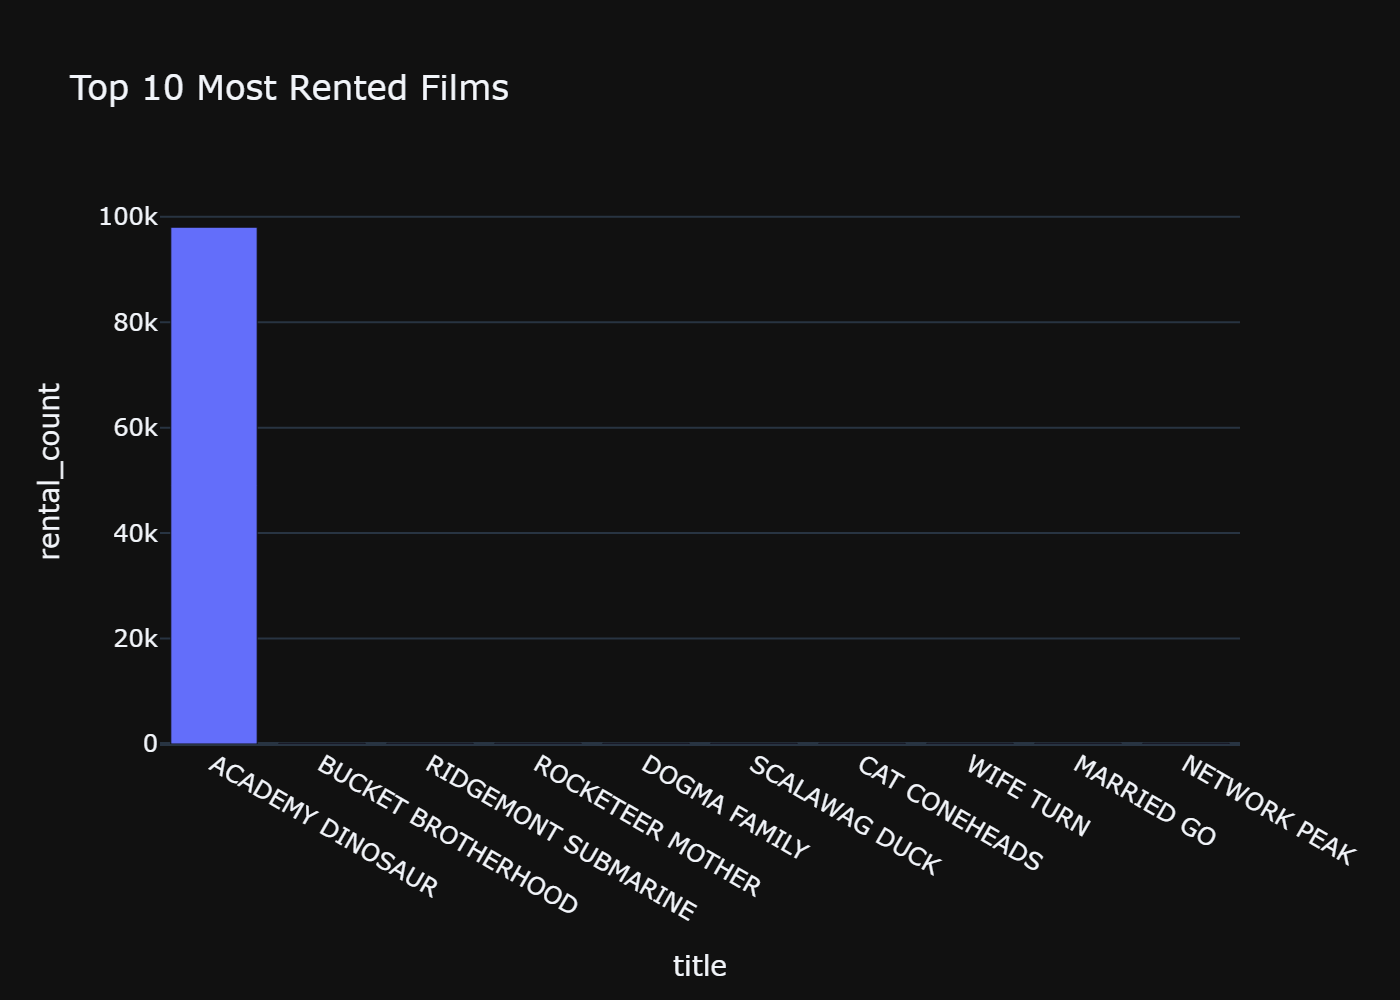

('SELECT f.title, COUNT(r.rental_id) AS rental_count\n    FROM film f\n    JOIN inventory i ON f.film_id = i.film_id\n    JOIN rental r ON i.inventory_id = r.inventory_id\n    GROUP BY f.title\n    ORDER BY rental_count DESC\n    LIMIT 10;',
                  title  rental_count
 0     ACADEMY DINOSAUR         98019
 1   BUCKET BROTHERHOOD           141
 2  RIDGEMONT SUBMARINE           140
 3     ROCKETEER MOTHER           140
 4         DOGMA FAMILY           140
 5        SCALAWAG DUCK           140
 6        CAT CONEHEADS           140
 7            WIFE TURN           140
 8           MARRIED GO           139
 9         NETWORK PEAK           139,
 Figure({
     'data': [{'hovertemplate': 'title=%{x}<br>rental_count=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
   

In [23]:
vn.ask("Which are the top 10 most rented films?")

SQL Prompt: [{'role': 'system', 'content': "You are a PostgreSQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\nCREATE TABLE public.actor (\n    actor_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,\n    first_name VARCHAR(45) NOT NULL,\n    last_name VARCHAR(45) NOT NULL,\n    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now()\n);\n\nCREATE TABLE public.category (\n    category_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,\n    name VARCHAR(25) NOT NULL,\n    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now()\n);\n\nCREATE TABLE public.film (\n    film_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,\n    title VARCHAR(255) NOT NULL,\n    description TEXT,\n    release_year YEAR,\n    language_id SMALLINT NOT NULL,\n    original_language_id SMALLINT,\n    rental_duration SMALLINT 

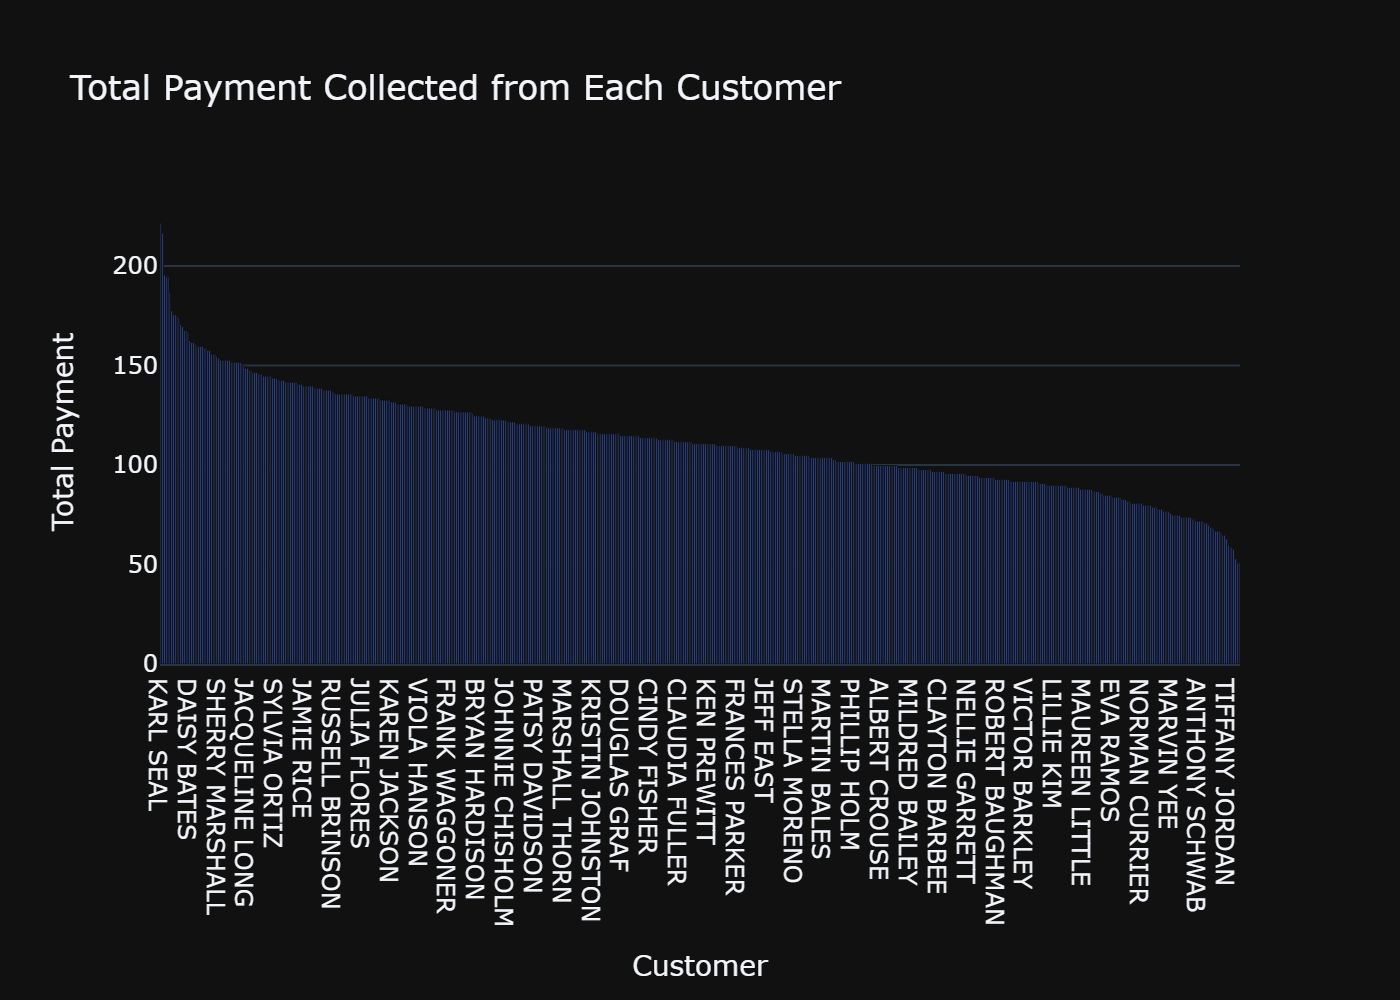

('SELECT c.first_name, c.last_name, SUM(p.amount) AS total_payment\n    FROM customer c\n    JOIN payment p ON c.customer_id = p.customer_id\n    GROUP BY c.first_name, c.last_name\n    ORDER BY total_payment DESC;',
     first_name last_name total_payment
 0         KARL      SEAL        221.55
 1      ELEANOR      HUNT        216.54
 2        CLARA      SHAW        195.58
 3       RHONDA   KENNEDY        194.61
 4       MARION    SNYDER        194.61
 ..         ...       ...           ...
 594      ANNIE   RUSSELL         58.82
 595     JOHNNY    TURPIN         57.81
 596      BRIAN     WYMAN         52.88
 597      LEONA    OBRIEN         50.86
 598   CAROLINE    BOWMAN         50.85
 
 [599 rows x 3 columns],
 Figure({
     'data': [{'hovertemplate': 'Customer=%{x}<br>Total Payment=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': 'royalblue', 'pattern': {'shape': ''}},
               'name': '',
               'orientation': 'v',
         

In [24]:
vn.ask("What is the total payment collected from each customer?")

SQL Prompt: [{'role': 'system', 'content': "You are a PostgreSQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\nCREATE TABLE public.actor (\n    actor_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,\n    first_name VARCHAR(45) NOT NULL,\n    last_name VARCHAR(45) NOT NULL,\n    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now()\n);\n\nCREATE TABLE public.category (\n    category_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,\n    name VARCHAR(25) NOT NULL,\n    last_update TIMESTAMP WITHOUT TIME ZONE NOT NULL DEFAULT now()\n);\n\nCREATE TABLE public.film (\n    film_id SMALLINT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY,\n    title VARCHAR(255) NOT NULL,\n    description TEXT,\n    release_year YEAR,\n    language_id SMALLINT NOT NULL,\n    original_language_id SMALLINT,\n    rental_duration SMALLINT 

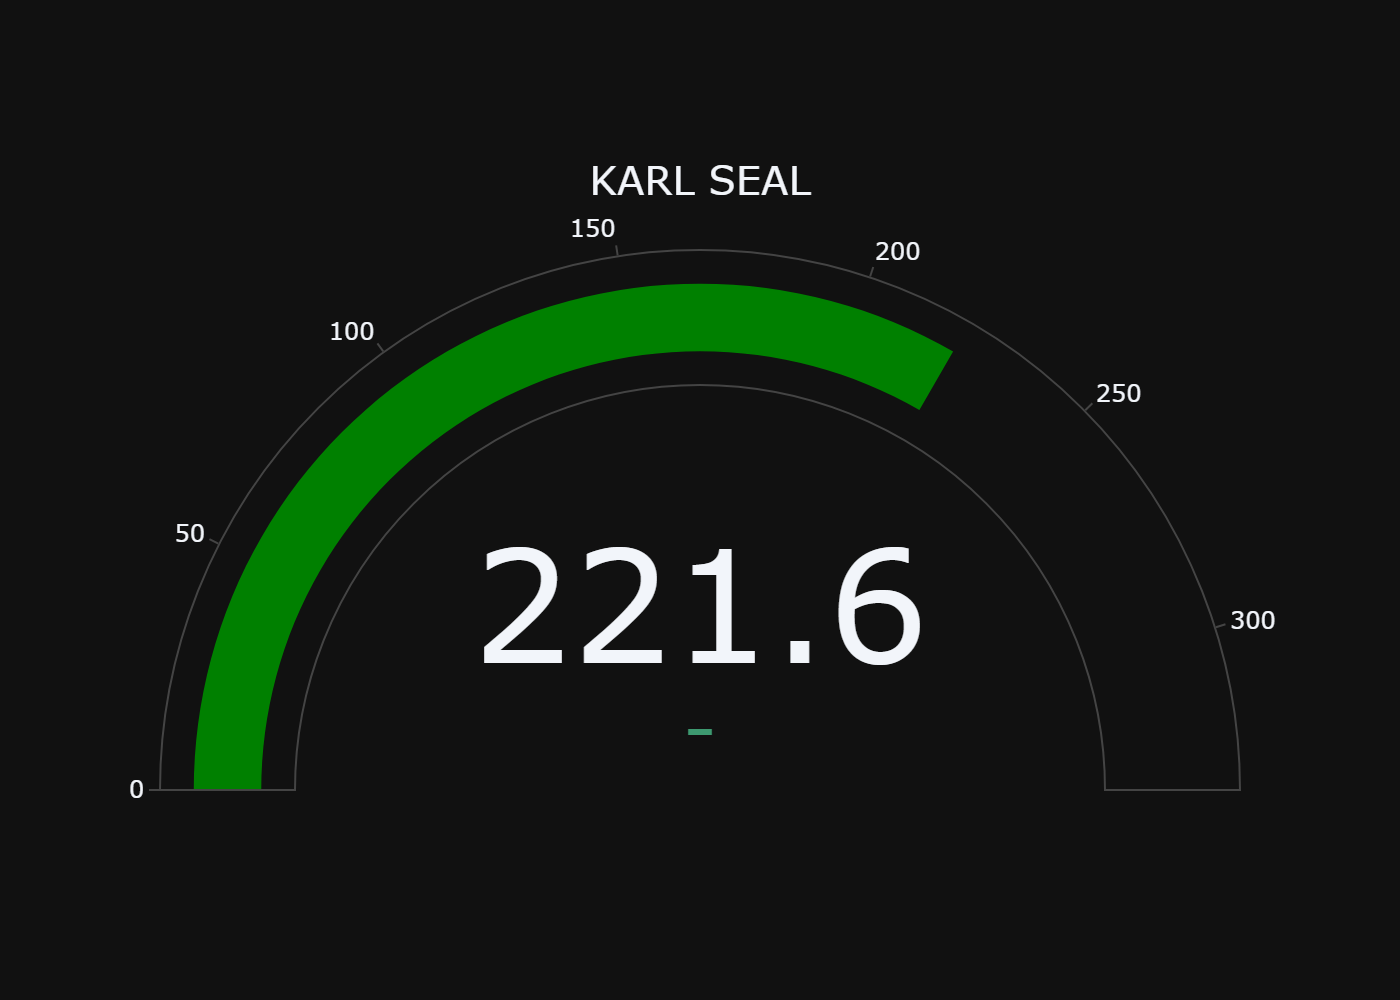

('SELECT c.first_name, c.last_name, SUM(p.amount) AS total_spent\n    FROM customer c\n    JOIN payment p ON c.customer_id = p.customer_id\n    GROUP BY c.first_name, c.last_name\n    ORDER BY total_spent DESC\n    LIMIT 1;',
   first_name last_name total_spent
 0       KARL      SEAL      221.55,
 Figure({
     'data': [{'mode': 'number+gauge+delta', 'title': {'text': 'KARL SEAL'}, 'type': 'indicator', 'value': 221.55}],
     'layout': {'template': '...'}
 }))

In [25]:
vn.ask("Which customer has spent the most money on rentals?")

#### Frontend

In [27]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on
None
None
None
None
